<a href="https://colab.research.google.com/github/karolinaprygiel/ai-project/blob/main/(eng)satisfaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Passenger Satisfaction Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading


Data [link](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

Dataset has already been splitted into train and test, where train contains 80% of all data and test 20%.

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/test.csv')

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

## Let's take a look at the loaded data


In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Columns descriptions (from Kaggle)



Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Dataset contains 25 columns and 103903 rows.

## Chaning column's names

Some column names contain spaces. It will be easier to process these columns if we replace these spaces with "_".

In [5]:
train.columns = train.columns.str.replace(' ','_')
test.columns = test.columns.str.replace(' ','_')

In [6]:
train.columns

Index(['Unnamed:_0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

# Data visualisation

## Categorical data

Text(0.5, 1.0, 'Type_of_Travel')

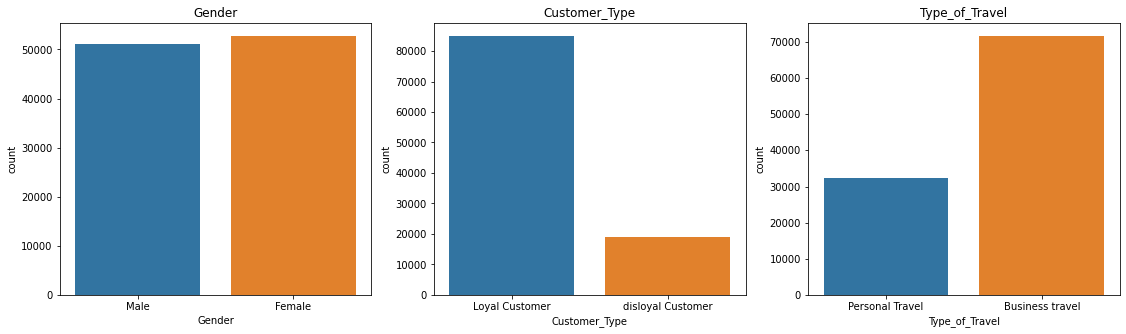

In [7]:
fig,axes = plt.subplots(1,3,figsize = (19,5))
sns.countplot(ax=axes[0],x='Gender', data=train).set_title("Gender")
sns.countplot(ax=axes[1],x='Customer_Type', data=train).set_title("Customer_Type")
sns.countplot(ax=axes[2],x='Type_of_Travel', data=train).set_title("Type_of_Travel")


The dataset contains a similar amount of data on passengers of both genders. The vast majority of them are loyal customers. Most of the trips were of a business nature.

### Ratings of satisfaction factors (scale 1-5; 0 - no data)

Text(0.5, 1.0, 'Leg room service')

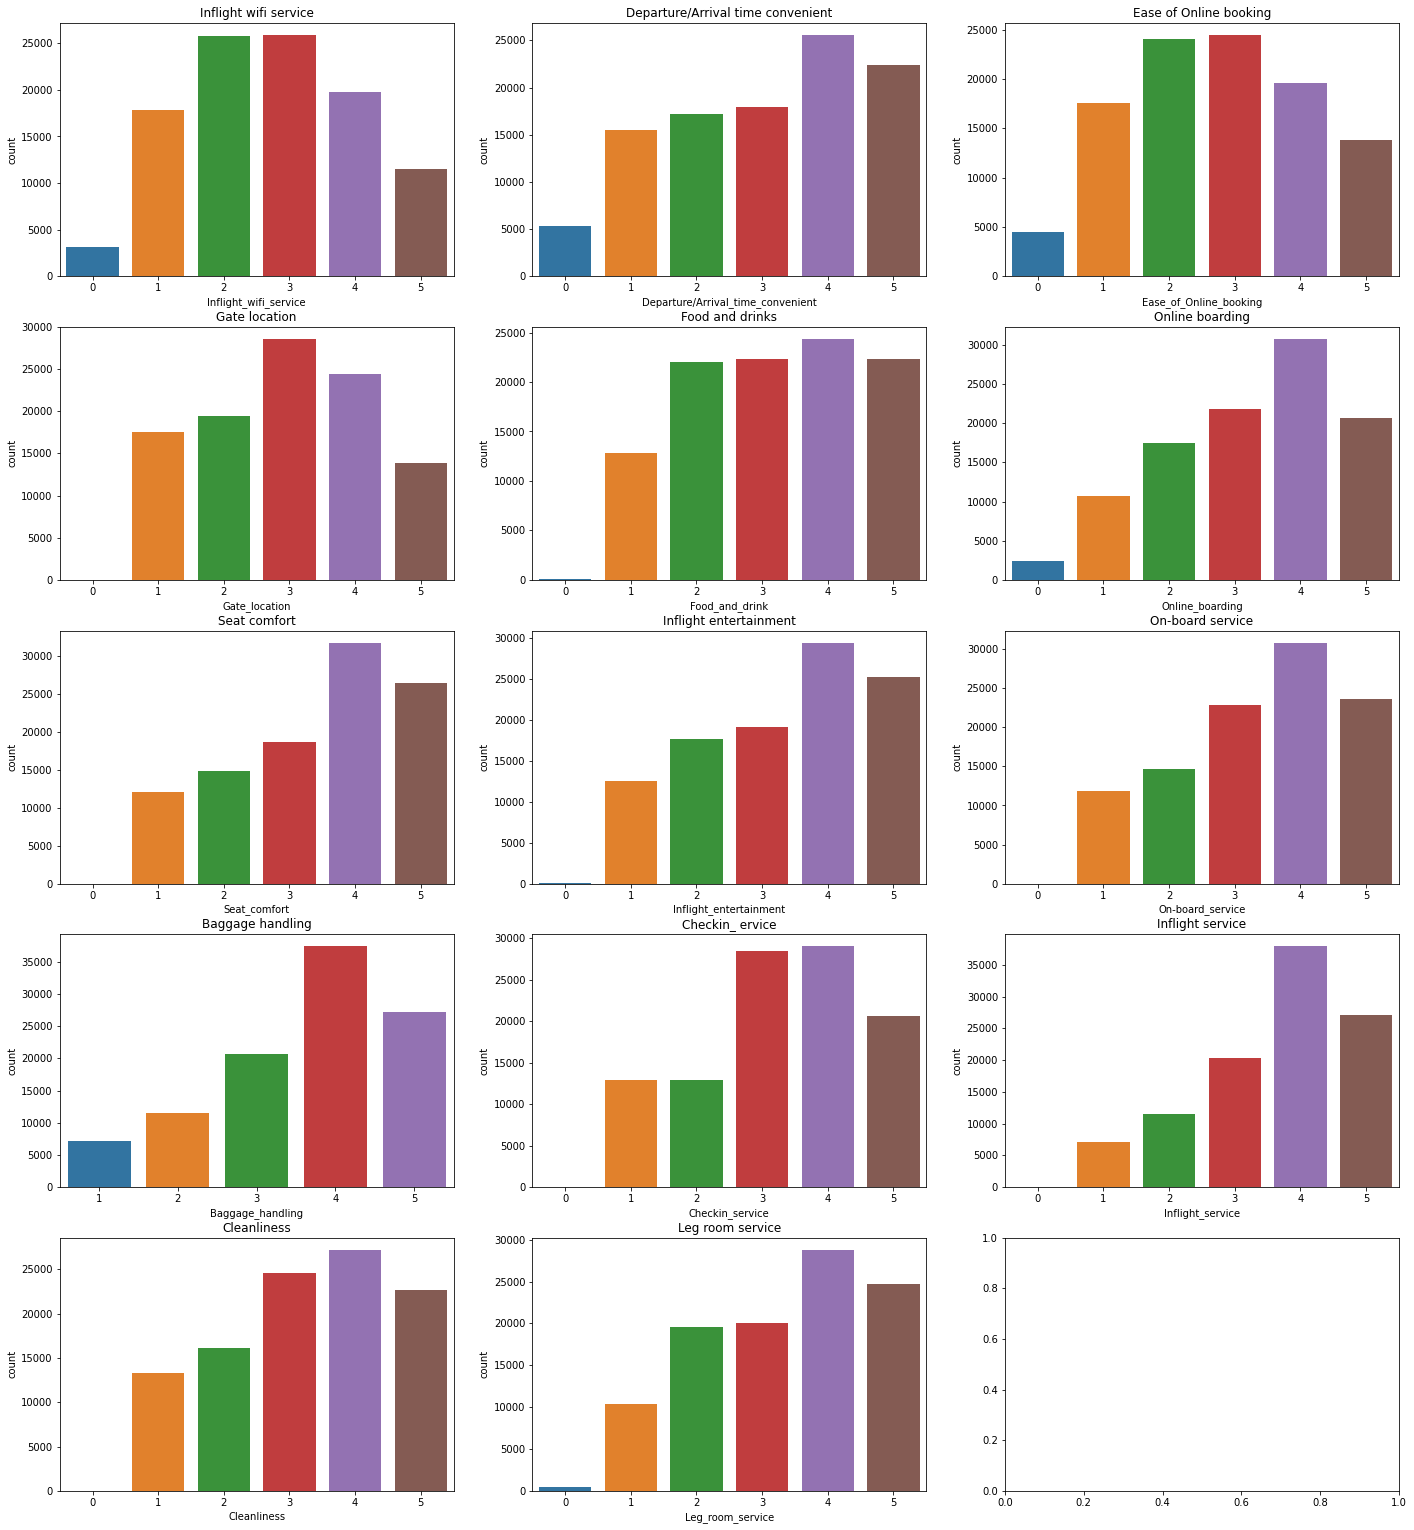

In [18]:
fig,axes = plt.subplots(5,3,figsize = (24,27))
sns.countplot(ax=axes[0,0],x='Inflight_wifi_service', data=train).set_title("Inflight wifi service")
sns.countplot(ax=axes[0,1],x='Departure/Arrival_time_convenient', data=train).set_title("Departure/Arrival time convenient")
sns.countplot(ax=axes[0,2],x='Ease_of_Online_booking', data=train).set_title("Ease of Online booking")
sns.countplot(ax=axes[1,0],x='Gate_location', data=train).set_title("Gate location")
sns.countplot(ax=axes[1,1],x='Food_and_drink', data=train).set_title("Food and drinks")
sns.countplot(ax=axes[1,2],x='Online_boarding', data=train).set_title("Online boarding")
sns.countplot(ax=axes[2,0],x='Seat_comfort', data=train).set_title("Seat comfort")
sns.countplot(ax=axes[2,1],x='Inflight_entertainment', data=train).set_title("Inflight entertainment")
sns.countplot(ax=axes[2,2],x='On-board_service', data=train).set_title("On-board service")
sns.countplot(ax=axes[3,0],x='Baggage_handling', data=train).set_title("Baggage handling")
sns.countplot(ax=axes[3,1],x='Checkin_service', data=train).set_title("Checkin_ ervice")
sns.countplot(ax=axes[3,2],x='Inflight_service', data=train).set_title("Inflight service")
sns.countplot(ax=axes[4,0],x='Cleanliness', data=train).set_title("Cleanliness")
sns.countplot(ax=axes[4,1],x='Leg_room_service', data=train).set_title("Leg room service")





## Numerical data

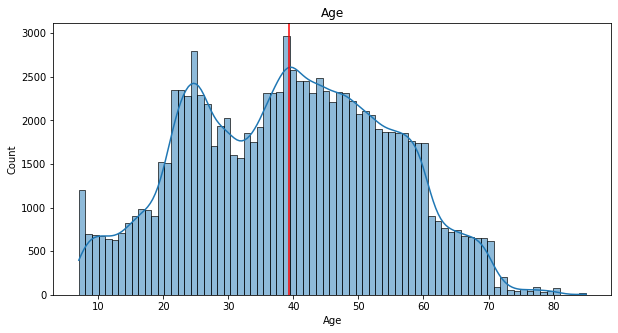

In [9]:
fig = plt.figure(figsize = (10,5))
sns.histplot(train['Age'], kde="True", ax=fig.gca()).set_title("Age")
plt.axvline(train['Age'].mean(), color='red')

Dataset contains data of travelers aged 8 - 85 years. Majority of passengers are between 20 and 70 years old. The average age is 39.

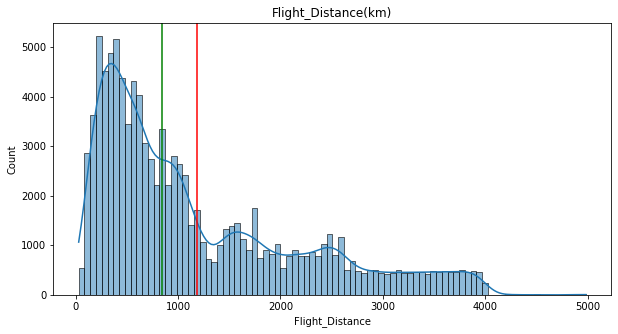

In [10]:
fig = plt.figure(figsize = (10,5))
sns.histplot(train['Flight_Distance'], kde="True", ax=fig.gca()).set_title("Flight_Distance(km)")
plt.axvline(train['Flight_Distance'].mean(), color='red')
plt.axvline(train['Flight_Distance'].median(), color='green')

In [11]:
print(train['Flight_Distance'].mean())
print(train['Flight_Distance'].median())

1189.4483754234677
843.0


The vast majority of flights were less than 1000 km. The median distance is 843 km.

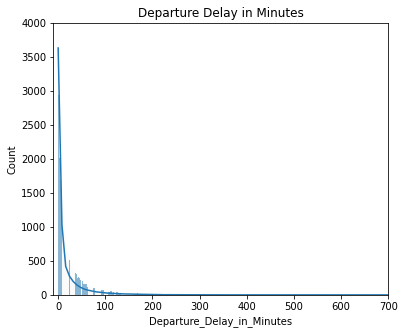

In [12]:
fig = plt.figure(figsize = (6,5))
sns.histplot(train['Departure_Delay_in_Minutes'], kde="True", ax=fig.gca()).set_title("Departure Delay in Minutes")
plt.xlim(-10, 700)
plt.ylim(0, 4000)
plt.show()

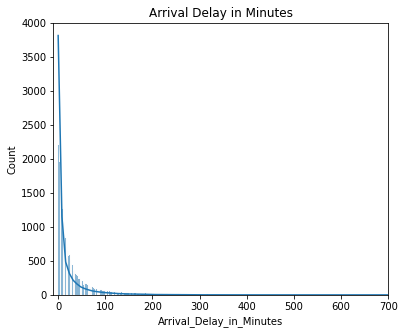

In [13]:
fig = plt.figure(figsize = (6,5))
sns.histplot(train['Arrival_Delay_in_Minutes'], kde="True", ax=fig.gca()).set_title("Arrival Delay in Minutes")
plt.xlim(-10, 700)
plt.ylim(0, 4000)
plt.show()

### Check for balance



Text(0.5, 1.0, 'Flight satisfaction')

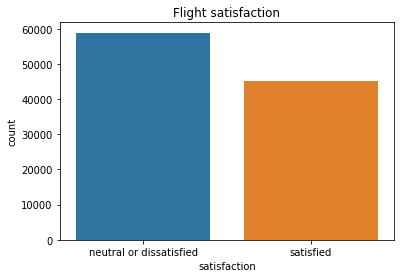

In [14]:
sns.countplot(x='satisfaction', data=train).set_title("Flight satisfaction")

In [15]:
train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

The data is balanced.

## Categorical data vs Flight satisfaction

Text(0.5, 1.0, 'Type of Travel')

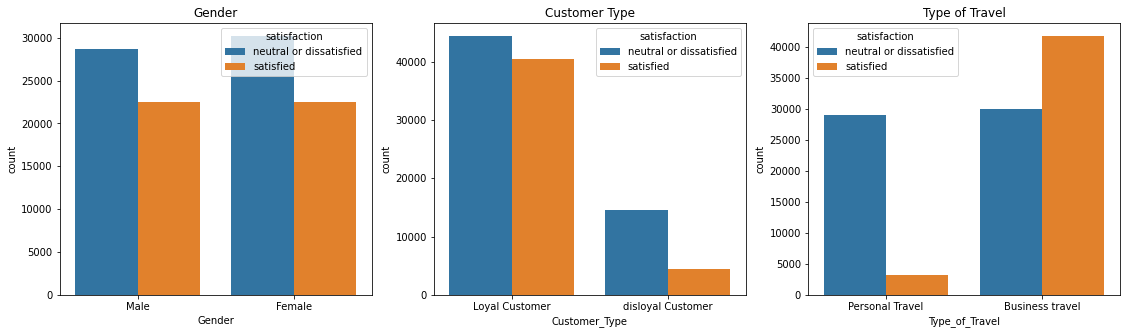

In [16]:
fig,axes = plt.subplots(1,3,figsize = (19,5))
sns.countplot(ax=axes[0],x='Gender', hue="satisfaction", data=train).set_title("Gender")
sns.countplot(ax=axes[1],x='Customer_Type',hue="satisfaction", data=train).set_title("Customer Type")
sns.countplot(ax=axes[2],x='Type_of_Travel',hue="satisfaction", data=train).set_title("Type of Travel")

**Conclusions** <br> 
* Gender does not seem to affect satisfaction. <br> 
* Loyal customers are more often satisfied than dislayel <br> 
* Business travelers were much more satisfied than personal travelers.


Text(0.5, 1.0, 'Leg room service')

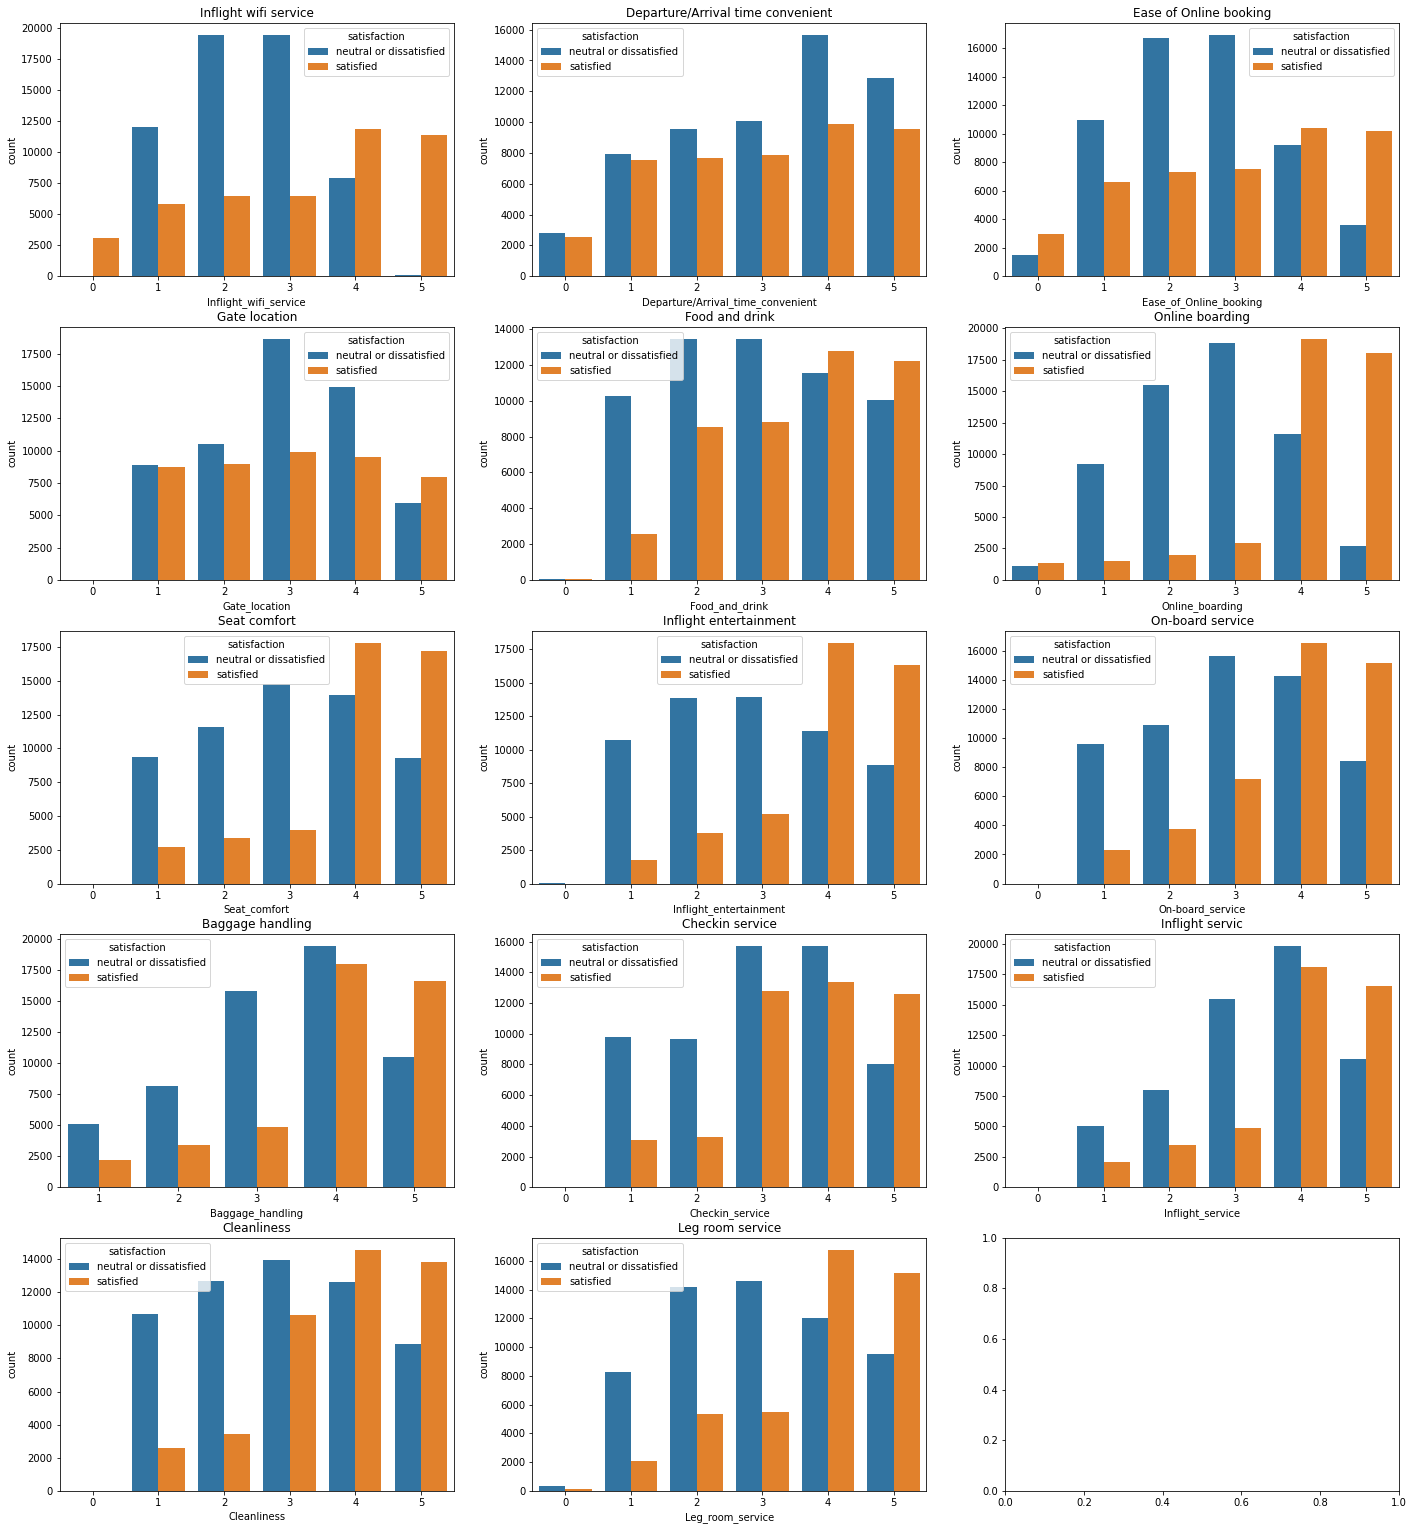

In [17]:
fig,axes = plt.subplots(5,3,figsize = (24,27))
sns.countplot(ax=axes[0,0],x='Inflight_wifi_service', hue="satisfaction", data=train).set_title("Inflight wifi service")
sns.countplot(ax=axes[0,1],x='Departure/Arrival_time_convenient', hue="satisfaction", data=train).set_title("Departure/Arrival time convenient")
sns.countplot(ax=axes[0,2],x='Ease_of_Online_booking', hue="satisfaction", data=train).set_title("Ease of Online booking")
sns.countplot(ax=axes[1,0],x='Gate_location', hue="satisfaction", data=train).set_title("Gate location")
sns.countplot(ax=axes[1,1],x='Food_and_drink', hue="satisfaction", data=train).set_title("Food and drink")
sns.countplot(ax=axes[1,2],x='Online_boarding', hue="satisfaction", data=train).set_title("Online boarding")
sns.countplot(ax=axes[2,0],x='Seat_comfort', hue="satisfaction", data=train).set_title("Seat comfort")
sns.countplot(ax=axes[2,1],x='Inflight_entertainment', hue="satisfaction", data=train).set_title("Inflight entertainment")
sns.countplot(ax=axes[2,2],x='On-board_service', hue="satisfaction", data=train).set_title("On-board service")
sns.countplot(ax=axes[3,0],x='Baggage_handling', hue="satisfaction", data=train).set_title("Baggage handling")
sns.countplot(ax=axes[3,1],x='Checkin_service', hue="satisfaction", data=train).set_title("Checkin service")
sns.countplot(ax=axes[3,2],x='Inflight_service', hue="satisfaction", data=train).set_title("Inflight servic")
sns.countplot(ax=axes[4,0],x='Cleanliness', hue="satisfaction", data=train).set_title("Cleanliness")
sns.countplot(ax=axes[4,1],x='Leg_room_service', hue="satisfaction", data=train).set_title("Leg room service")


**Conclusions** <br>
* Satisfaction increases with the quality of the wifi on board
* Satisfaction with online booking is also a factor
* Convenient arrival time has a rather small impact on overall satisfaction
* Online boarding is very conducive to increasing overall satisfaction
* Only seating comfort rated at 4 or 5 contributes to overall satisfaction, same as inflight entertainment, legcroom service, baggage handling, inflight service

## Numerical data vs Flight Satisfaction

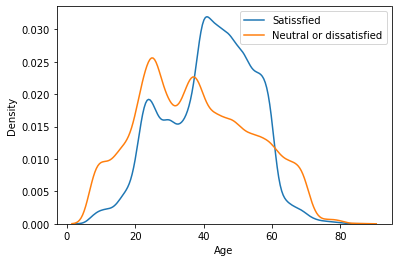

In [ ]:
sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Age'],label='Satissfied')
sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Age'],label='Neutral or dissatisfied')
plt.legend()
plt.show()

People aged 40-60 are particularly dissatisfied with the flight.

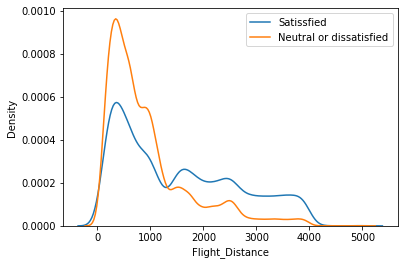

In [ ]:
sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Flight_Distance'],label='Satissfied')
sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Flight_Distance'],label='Neutral or dissatisfied')
plt.legend()
plt.show()

Interestingly, customers on short distances are more often dissatisfied, and on long distances - satisfied. The boundary is about 1200 km.

In [ ]:
# plt.figure(figsize = (36,5))
# plt.xlim(0, 400)
# sns.kdeplot(x=train.loc[train['satisfaction']=="satisfied"]['Departure_Delay_in_Minutes'],label='Satissfied')
# sns.kdeplot(x=train.loc[train['satisfaction']=="neutral or dissatisfied"]['Departure_Delay_in_Minutes'],label='Neutral or dissatisfied')
# plt.legend()
# plt.show()

### Let's look at correlation


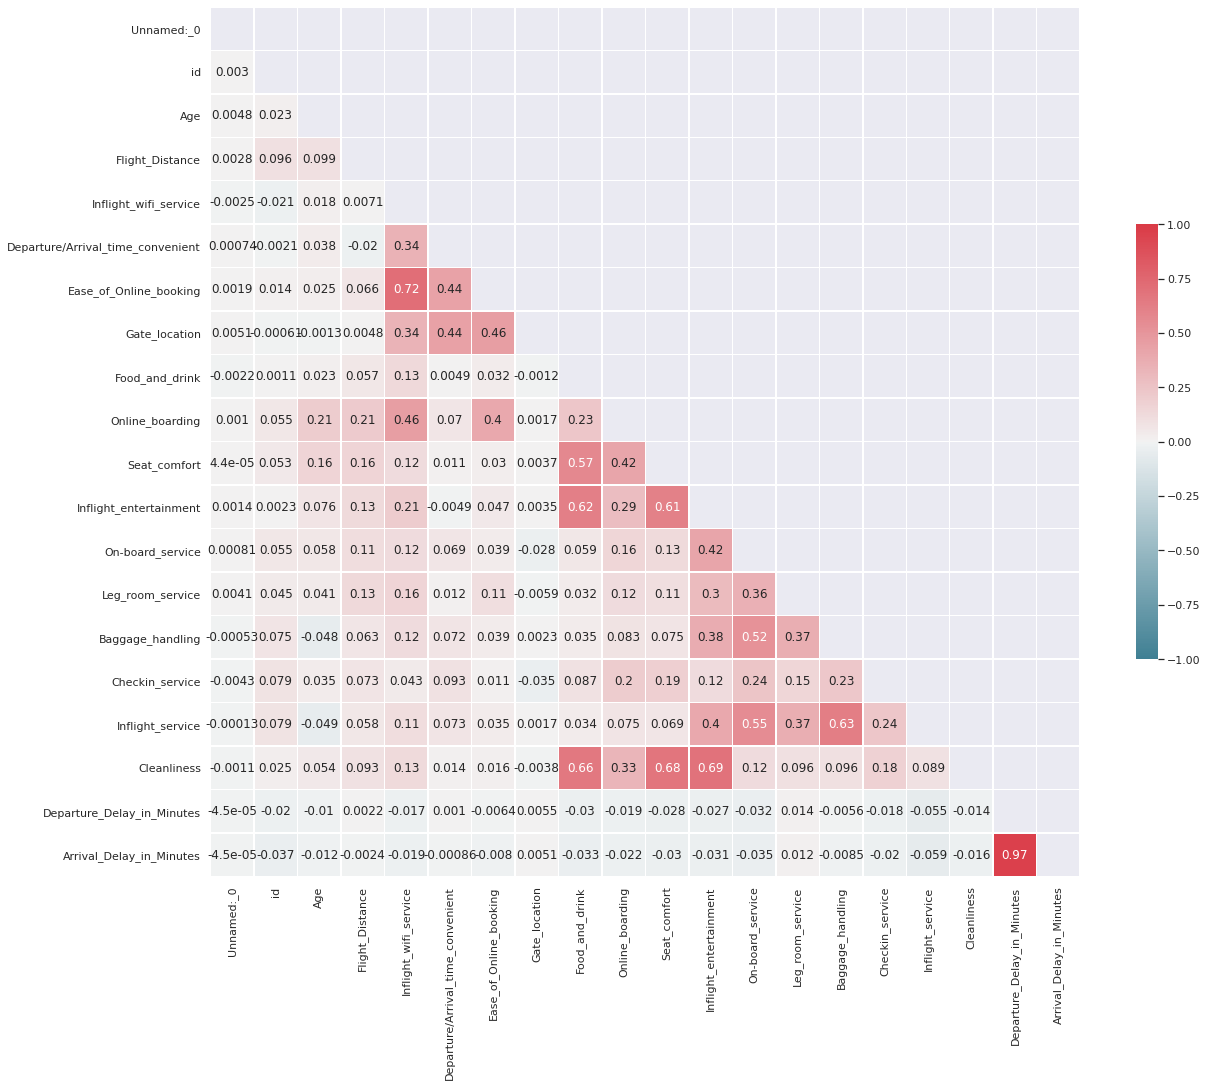

In [ ]:
sns.set(style="darkgrid")

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(20, 16))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [19]:
train.describe()

,Unnamed:_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data processing

Let's take another look at the data in each column.

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [21]:
print(train["Unnamed:_0"].nunique())
print(train["id"].nunique())

103904
103904


**The Unnamed: _0 and id columns are unique to each row, so we can remove them.**

In [22]:
train.drop(columns=['id', "Unnamed:_0" ],inplace=True) 

In [23]:
test.drop(columns=['id', "Unnamed:_0" ],inplace=True) 

In [24]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##Missing data problem

In [ ]:
train.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

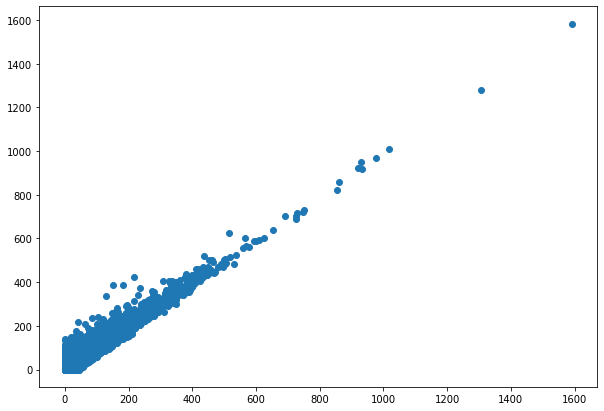

In [25]:
fig = plt.figure(figsize = (10,7))
plt.scatter(train['Departure_Delay_in_Minutes'], train['Arrival_Delay_in_Minutes'])

310 values are missing in the Arrival_Delay_in_Minutes column. From the correlation plot we can see that this column is very strongly (0.97) correlated with the Departure_Delay_in_Minutes column, so we can try to replace the missing values in Arrival_Delay_in_Minutes with values from Departure_Delay_in_Minutes.

In [26]:
train['Arrival_Delay_in_Minutes'].fillna(train['Departure_Delay_in_Minutes'], inplace = True)
test['Arrival_Delay_in_Minutes'].fillna(test['Departure_Delay_in_Minutes'], inplace = True)

In [27]:
train.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

We should also look at the columns containing the ratings of various factors on a scale of 1-5. Some of them also contain 0, which according to the description means no data / not applicable.

In [28]:
columns = ['Inflight_wifi_service','Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 
           'Gate_location','Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 
           'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']

In [29]:
for column in columns:
  print(column + ": " + str(train[train[column] == 0].shape[0]) )


Inflight_wifi_service: 3103
Departure/Arrival_time_convenient: 5300
Ease_of_Online_booking: 4487
Gate_location: 1
Food_and_drink: 107
Online_boarding: 2428
Seat_comfort: 1
Inflight_entertainment: 14
On-board_service: 3
Baggage_handling: 0
Checkin_service: 1
Inflight_service: 3
Cleanliness: 12


We can delete data that has less than 150 missing values.


In [32]:
for column in columns:
  if (train[train[column] == 0].shape[0] < 150) or  (test[test[column] == 0].shape[0] < 150):
    train = train[train[column] != 0]

Let's look at the rest of columns

In [33]:
for column in columns:
  if train[train[column] == 0].shape[0] > 0:
    print(column + ": " + str(train[train[column] == 0].shape[0]) )

Inflight_wifi_service: 3048
Departure/Arrival_time_convenient: 5266
Ease_of_Online_booking: 4393
Online_boarding: 2428


## Label Encoding

In [31]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in ['Gender', 'Customer_Type', 'Type_of_Travel', 'satisfaction' ]:
  train[column] = label_encoder.fit_transform(train[column])
  test[column] = label_encoder.fit_transform(test[column])


In [35]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


##One-hot encoding

In [36]:
train["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [37]:
one_hot = pd.get_dummies(train['Class'])
train = train.drop('Class',axis = 1)
train = train.join(one_hot)


In [38]:
one_hot = pd.get_dummies(test['Class'])
test = test.drop('Class',axis = 1)
test = test.join(one_hot)

In [39]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Business,Eco,Eco Plus
0,1,0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0


## Let's look again at correlation map

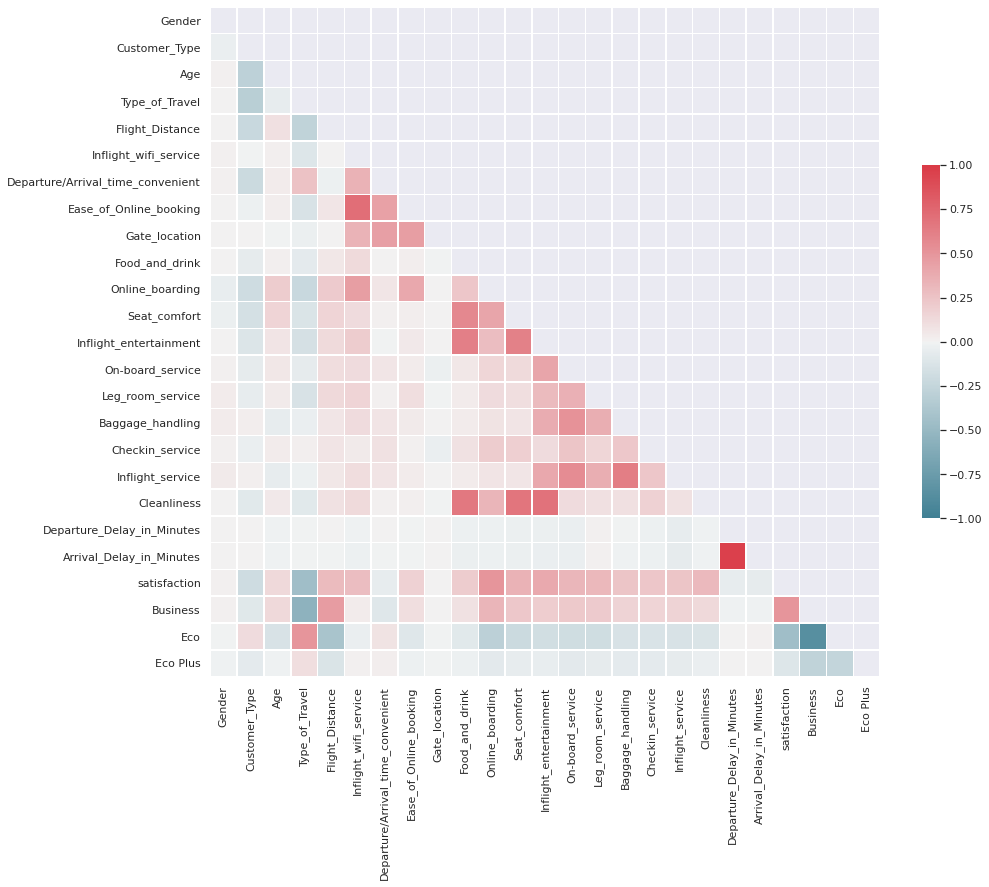

In [ ]:
sns.set(style="darkgrid")

corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

# Data modelling

The data was already divided into train and test on Kaggle.

In [40]:
X_train = train.loc[:, train.columns != "satisfaction"]
y_train = train["satisfaction"]

X_test = test.loc[:, test.columns != "satisfaction"]
y_test = test["satisfaction"]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

##Modells
* Logistic Regression
* Random Forests
* SVM - linear
* SVM - poly
* SVM - rbf
* Linear SVC
* Decision Trees
* Ada Boost
* Gradient Boost
* XGBoost

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

In [45]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

## Logistic Regression

In [46]:
pipe_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=1, solver='newton-cg'))])


param_grid = {
            'scaler': [StandardScaler(), None],
            'classifier__C': [0.05, 0.1, 1, 10],
            
}

grid_1 = GridSearchCV(pipe_1, param_grid, cv=kfold, n_jobs=-1)

In [ ]:
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.1, 'scaler': None}

In [ ]:
model_1_preds = grid_1.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_1_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_1_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_1_preds)))


precision: 0.8695771554091158
f1: 0.8510009404809888
accuracy: 0.8719202340622113


#### Best score
{'classifier__C': 0.1, 'scaler': None}<br>

precision: 0.8695771554091158<br>
f1: 0.8510009404809888<br>
accuracy: 0.8719202340622113<br>

In [47]:
logistic_regression_model = LogisticRegression(C= 0.1, solver='newton-cg')
logistic_regression_model.fit(X_train, y_train)
logistic_regression_model_preds = logistic_regression_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, logistic_regression_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, logistic_regression_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, logistic_regression_model_preds)))
print('Classification report : \n' + str(classification_report(logistic_regression_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,logistic_regression_model_preds)))

precision: 0.8695771554091158
f1: 0.8510009404809888
accuracy: 0.8719202340622113 

Classification report : 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     15050
           1       0.83      0.87      0.85     10926

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix : 
[[13148  1425]
 [ 1902  9501]]


## Random Forests

In [48]:
pipe_2 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=200, max_leaf_nodes=800, 
                                                         max_depth=30, min_samples_leaf=2))
                  ])

param_grid_2 = {
              'scaler': [StandardScaler(), None],
              'classifier__min_samples_leaf': [1, 2, 4],  
              'classifier__n_estimators': [20, 30, 50],
              'classifier__max_leaf_nodes': [300, 500, 600],
              'classifier__max_depth': [10, 30, 40]
             }

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_2.fit(X_train, y_train)
grid_2.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'classifier__max_depth': 30,
 'classifier__max_leaf_nodes': 500,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50,
 'scaler': StandardScaler()}

In [ ]:
model_2_preds = grid_2.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_2_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_2_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_2_preds)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,model_2_preds)))

precision: 0.9607612143180788
f1: 0.9450040110526785
accuracy: 0.9524946104096089
Confusion Matrix : 
[[14140   433]
 [  801 10602]]


##### Best score
{'classifier__max_depth': 30,<br>
 'classifier__max_leaf_nodes': 800,<br>
 'classifier__min_samples_leaf': 2,<br>
 'classifier__n_estimators': 200,<br>
 'scaler': StandardScaler()}<br>

precision: 0.9607612143180788<br>
f1: 0.9450040110526785<br>
accuracy: 0.9524946104096089<br>

In [49]:
random_forests_model = pipe_2.fit(X_train, y_train)
random_forests_model_preds = random_forests_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, random_forests_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, random_forests_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, random_forests_model_preds)))
print('Classification report : \n' + str(classification_report(random_forests_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,random_forests_model_preds)))

precision: 0.9617955202312138
f1: 0.9476307007786429
accuracy: 0.9546889436402833 

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14904
           1       0.93      0.96      0.95     11072

    accuracy                           0.95     25976
   macro avg       0.95      0.96      0.95     25976
weighted avg       0.96      0.95      0.95     25976

Confusion Matrix : 
[[14150   423]
 [  754 10649]]


## SVM - linear

###### From scikit-learn documentation: 
The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using sklearn.linear_model.LinearSVC or sklearn.linear_model.SGDClassifier instead, possibly after a sklearn.kernel_approximation.Nystroem transformer.

In [50]:
pipe_3 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', (SVC(kernel="linear", max_iter=6000, )))
                  ])

param_grid_3 = {
              'classifier__C': [ 1, 5, 10, 20]
             }

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'classifier__C': 20}

In [ ]:
model_3_preds = grid_3.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_3_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_3_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_3_preds)))

precision: 0.5568189159506428
f1: 0.6412469310319173
accuracy: 0.6287342161995688


### SVM - linear without GridSearchCV

In [51]:
svm_linear_model = pipe_3.fit(X_train, y_train)
svm_linear_model_preds = svm_linear_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, svm_linear_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, svm_linear_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, svm_linear_model_preds)))
print('Classification report : \n' + str(classification_report(svm_linear_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, svm_linear_model_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


precision: 0.535950023573786
f1: 0.6410771562511015
accuracy: 0.6079842931937173 

Classification report : 
              precision    recall  f1-score   support

           0       0.46      0.74      0.57      9008
           1       0.80      0.54      0.64     16968

    accuracy                           0.61     25976
   macro avg       0.63      0.64      0.60     25976
weighted avg       0.68      0.61      0.62     25976

Confusion Matrix : 
[[6699 7874]
 [2309 9094]]


## SVM - poly

In [52]:
pipe_4 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', SVC(kernel="poly", max_iter=5000, degree=5, C=0.1))
                  ])

param_grid_4 = {
              'scaler': [StandardScaler(), None],
              'classifier__C': [0.01, 0.1, 1],
             'classifier__coef0': [0.01, 0.1, 1, 10],
             'classifier__degree': [1, 2, 3, 4, 5, 6]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True, n_jobs=-1, verbose=1)

In [ ]:
grid_4.fit(X_train, y_train)
grid_4.best_params_

In [ ]:
model_4_preds = grid_4.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_4_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_4_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_4_preds)))

### SVM - poly without GridSearchCV



In [53]:
svm_poly_model = pipe_4.fit(X_train, y_train)
svm_poly_model_preds = svm_poly_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, svm_poly_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, svm_poly_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, svm_poly_model_preds)))
print('Classification report : \n' + str(classification_report(svm_poly_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, svm_poly_model_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


precision: 0.439015939015939
f1: 0.6101613291596436
accuracy: 0.43905913150600556 

Classification report : 
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         2
           1       1.00      0.44      0.61     25974

    accuracy                           0.44     25976
   macro avg       0.50      0.72      0.31     25976
weighted avg       1.00      0.44      0.61     25976

Confusion Matrix : 
[[    2 14571]
 [    0 11403]]


## SVM - rbf

In [54]:
from sklearn.svm import SVR
from sklearn import preprocessing
pipe_5 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', SVC(kernel="rbf", max_iter=5000))
                  ])

param_grid_5 = {
              'classifier__C': [0.001, 0.001, 0.1],
              'classifier__gamma': [0.01, 0.1, 1]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_5.fit(X_train, y_train)
grid_5.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'classifier__C': 1, 'classifier__gamma': 0.1}

In [ ]:
model_5_preds = grid_5.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_5_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_5_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_5_preds)))

precision: 0.9372392365734576
f1: 0.9315334392094583
accuracy: 0.9402525408068987


### SVM - rbf without GridSearchCV

In [55]:
svm_rbf_model = pipe_5.fit(X_train, y_train)
svm_rbf_model_preds = svm_rbf_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, svm_rbf_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, svm_rbf_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, svm_rbf_model_preds)))
print('Classification report : \n' + str(classification_report(svm_rbf_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, svm_rbf_model_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


precision: 0.9251139196973605
f1: 0.9342710775375532
accuracy: 0.9417154296273483 

Classification report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14345
           1       0.94      0.93      0.93     11631

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Confusion Matrix : 
[[13702   871]
 [  643 10760]]


## Linear SVC

In [56]:
pipe_6 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', LinearSVC(C=0.1))
                  ])

param_grid_6 = {
              'scaler': [StandardScaler(), None],
              'classifier__C': [0.01, 0.05, 0.1, 1, 10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True, n_jobs=-1, verbose=1)

In [ ]:
grid_6.fit(X_train, y_train)
grid_6.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'classifier__C': 0.1,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [ ]:
model_6_preds = grid_6.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_6_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_6_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_6_preds)))

#### Best score

{'classifier__C': 0.1,<br>
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}<br>
 precision: 0.8693577981651376<br>
f1: 0.849751154553199<br>
accuracy: 0.8709963042808746<br>

In [57]:
linearSVC_model = pipe_6.fit(X_train, y_train)
linearSVC_model_preds = linearSVC_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, linearSVC_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, linearSVC_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, linearSVC_model_preds)))
print('Classification report : \n' + str(classification_report(linearSVC_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,linearSVC_model_preds)))

precision: 0.8691820435141834
f1: 0.8493003229278794
accuracy: 0.8706498306128734 

Classification report : 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     15083
           1       0.83      0.87      0.85     10893

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix : 
[[13148  1425]
 [ 1935  9468]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [58]:
pipe_7 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())
                  ])
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_7 = {
            'scaler': [StandardScaler(), None],
            'classifier__criterion': ['gini', 'entropy'],  
            'classifier__max_depth': [35, 50, 100, 150, 250],
            'classifier__max_leaf_nodes': [100, 150, 350, 500, 600],
}

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True, verbose=10, n_jobs=-1)


In [ ]:
grid_7.fit(X_train, y_train)
grid_7.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 150,
 'classifier__max_leaf_nodes': 350,
 'scaler': None}

In [ ]:
model_7_preds = grid_7.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_7_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_7_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_7_preds)))

precision: 0.9732085512432334
f1: 0.9512151376558157
accuracy: 0.9581151832460733


##### Best score
{'classifier__criterion': 'entropy',<br>
 'classifier__max_depth': 150,<br>
 'classifier__max_leaf_nodes': 350,<br>
 'scaler': None}<br>

precision: 0.9732085512432334<br>
f1: 0.9512151376558157<br>
accuracy: 0.9581151832460733<br>

In [59]:
decision_tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=150, max_leaf_nodes=350)
decision_tree_model.fit(X_train, y_train)
decision_tree_model_preds = decision_tree_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, decision_tree_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, decision_tree_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, decision_tree_model_preds)))
print('Classification report : \n' + str(classification_report(decision_tree_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, decision_tree_model_preds)))

precision: 0.9734765051395007
f1: 0.9513431095564824
accuracy: 0.9582306744687403 

Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     15080
           1       0.93      0.97      0.95     10896

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix : 
[[14284   289]
 [  796 10607]]


## K-nearest neighbors 


In [ ]:
pipe_8 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', KNeighborsClassifier())
                  ])

param_grid_8 = {
              'classifier__p': [1, 10, 100],
             'classifier__n_neighbors': [3,5,9,11,19],
             'classifier__metric': ['euclidean','minkowski', 'manhattan']
                    }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_8.fit(X_train, y_train)
grid_8.best_params_

In [ ]:
model_8_preds = grid_8.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_8_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_8_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_8_preds)))

##### Why should we not use the KNN algorithm for large datasets?
Here is an overview of the data flow that occurs in the KNN algorithm:
* Calculate the distances to all vectors in a training set and store them
* Sort the calculated distances
* Store the K nearest vectors
* Calculate the most frequent class displayed by K nearest vectors

## Ada Boost

In [60]:

pipe_9 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=100, 
                                                                                           max_leaf_nodes=100), learning_rate=0.1, n_estimators=50))
                  ])

param_grid_9 = {
#                 'scaler': [StandardScaler(), None],
                'classifier__base_estimator__max_depth': [50, 100, 150, 200],
                'classifier__base_estimator__max_leaf_nodes': [50,100, 200, 300],
                  'classifier__n_estimators' : [10, 50, 100, 500],
                'classifier__learning_rate' : [ 0.01, 0.1, 1, 5,]
                    }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_9.fit(X_train, y_train)
grid_9.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'classifier__base_estimator__max_depth': 100,
 'classifier__base_estimator__max_leaf_nodes': 100,
 'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 50}

In [ ]:
model_9_preds = grid_9.best_estimator_.predict(X_test)
print("precision: {}".format(metrics.precision_score(y_test, model_9_preds)))
print("f1: {}".format(metrics.f1_score(y_test, model_9_preds)))
print("accuracy: {}".format(metrics.accuracy_score(y_test, model_9_preds)))

precision: 0.9771548193319377
f1: 0.958999553372041
accuracy: 0.9646596858638743


##### Best score
{'classifier__base_estimator__max_depth': 100,<br>
 'classifier__base_estimator__max_leaf_nodes': 100,<br>
 'classifier__learning_rate': 0.1,<br>
 'classifier__n_estimators': 50}<br>
 
precision: 0.9771548193319377<br>
f1: 0.958999553372041<br>
accuracy: 0.9646596858638743<br>

In [61]:
adaBoost_model = pipe_9.fit(X_train, y_train)
adaBoost_model_preds = adaBoost_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, adaBoost_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, adaBoost_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, adaBoost_model_preds)))
print('Classification report : \n' + str(classification_report(adaBoost_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,adaBoost_model_preds)))

precision: 0.9771548193319377
f1: 0.958999553372041
accuracy: 0.9646596858638743 

Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14989
           1       0.94      0.98      0.96     10987

    accuracy                           0.96     25976
   macro avg       0.96      0.97      0.96     25976
weighted avg       0.97      0.96      0.96     25976

Confusion Matrix : 
[[14322   251]
 [  667 10736]]


## Gradient Boost

In [62]:
pipe_10 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(learning_rate=0.1,n_estimators=1000 ))
                  ])

param_grid_10 = {
                'scaler': [StandardScaler(), None],
              'classifier__n_estimators' : [50, 100, 500],
            'classifier__learning_rate' : [0.01, 0.1,  1, 10]
                    }

grid_10 = GridSearchCV(pipe_10, param_grid_10, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)

In [ ]:
grid_10.fit(X_train, y_train)
grid_10.best_params_

#### Best score

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 1000,
 'scaler': StandardScaler()}<br>
 precision: 0.9686147186147186<br>
f1: 0.955048686141123<br>
accuracy: 0.961079457961195<br>

In [63]:
gradientBoost_model = pipe_10.fit(X_train, y_train)
gradientBoost_model_preds = gradientBoost_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, gradientBoost_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, gradientBoost_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, gradientBoost_model_preds)))
print('Classification report : \n' + str(classification_report(gradientBoost_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,gradientBoost_model_preds)))

precision: 0.9686147186147186
f1: 0.955048686141123
accuracy: 0.961079457961195 

Classification report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14888
           1       0.94      0.97      0.96     11088

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix : 
[[14225   348]
 [  663 10740]]


## XGBoost

In [64]:
import xgboost
from scipy.stats.distributions import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipe_11 = Pipeline([
                   ('scaler', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=500))
                  ])

param_grid_11 = {
                'scaler': [StandardScaler(), None],
                'classifier__n_estimators' : [50, 100, 200, 500, 1000],
                'classifier__learning_rate' : [0.01, 0.1,  1, 10]
                    }


# grid_11 = RandomizedSearchCV(
#     n_iter=300, estimator=pipe_11, 
#     cv=kfold, 
#     param_distributions=param_distribution,
#     return_train_score=True
# )

grid_11 = GridSearchCV(pipe_11, param_grid_11, cv=kfold, return_train_score=True, n_jobs=-1, verbose=10)


In [ ]:
grid_11.fit(X_train, y_train)
grid_11.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 16

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 500,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### Best score
{'classifier__learning_rate': 0.1,<br>
 'classifier__n_estimators': 500,<br>
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}<br>
<br>
precision: 0.9681235325988803<br>
f1: 0.9539529296614316<br>
accuracy: 0.9601555281798583<br

In [65]:
xgBoost_model = pipe_11.fit(X_train, y_train)
xgBoost_model_preds = xgBoost_model.predict(X_test)

print("precision: {}".format(metrics.precision_score(y_test, xgBoost_model_preds)))
print("f1: {}".format(metrics.f1_score(y_test, xgBoost_model_preds)))
print("accuracy: {} \n".format(metrics.accuracy_score(y_test, xgBoost_model_preds)))
print('Classification report : \n' + str(classification_report(xgBoost_model_preds, y_test)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, xgBoost_model_preds)))

precision: 0.966844340048785
f1: 0.9524741901032395
accuracy: 0.9588851247305205 

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14907
           1       0.94      0.97      0.95     11069

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix : 
[[14206   367]
 [  701 10702]]


# Neural network

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.callbacks import History

In [68]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(72654, 24) (72654,)
(31138, 24) (31138,)


In [69]:
history_Adam = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2400      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

In [70]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [71]:
history =model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=125)

Epoch 1/125
2271/2271 [==============================] - 22s 3ms/step - loss: 0.5151 - accuracy: 0.7550 - val_loss: 0.3865 - val_accuracy: 0.8352
Epoch 2/125
2271/2271 [==============================] - 5s 2ms/step - loss: 0.3793 - accuracy: 0.8508 - val_loss: 0.4341 - val_accuracy: 0.7900
Epoch 3/125
2271/2271 [==============================] - 5s 2ms/step - loss: 0.3617 - accuracy: 0.8594 - val_loss: 0.3005 - val_accuracy: 0.8793
Epoch 4/125
2271/2271 [==============================] - 5s 2ms/step - loss: 0.3459 - accuracy: 0.8616 - val_loss: 0.2986 - val_accuracy: 0.8736
Epoch 5/125
2271/2271 [==============================] - 5s 2ms/step - loss: 0.3208 - accuracy: 0.8710 - val_loss: 0.2501 - val_accuracy: 0.9012
Epoch 6/125
2271/2271 [==============================] - 5s 2ms/step - loss: 0.2964 - accuracy: 0.8781 - val_loss: 0.2264 - val_accuracy: 0.9075
Epoch 7/125
2271/2271 [==============================] - 5s 2ms/step - loss: 0.2828 - accuracy: 0.8851 - val_loss: 0.2182 - val_a

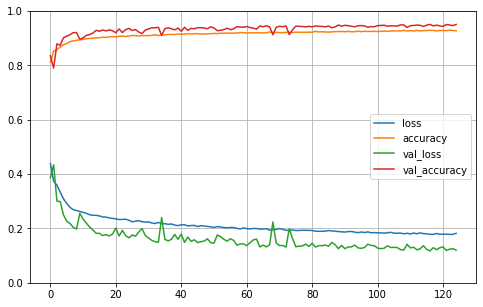

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
test_eval = model.evaluate(X_test,y_test)
test_eval

812/812 [==============================] - 1s 807us/step - loss: 0.1217 - accuracy: 0.9492


[0.1216825321316719, 0.9491838812828064]

In [74]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, confusion_matrix
y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[14198   375]
 [  945 10458]]
Accuracy:  0.949183862026486
f1 score:  0.9406368051807878


# Results summary & model comparsion

In [ ]:
models = [logistic_regression_model_preds, random_forests_model_preds, svm_linear_model_preds, svm_poly_model_preds, svm_rbf_model_preds, linearSVC_model_preds, decision_tree_model_preds, adaBoost_model_preds, gradientBoost_model_preds]

In [75]:
logistic_regression_df = pd.DataFrame(data=[metrics.f1_score(y_test, logistic_regression_model_preds), metrics.accuracy_score(y_test, logistic_regression_model_preds),
                                            metrics.recall_score(y_test, logistic_regression_model_preds), metrics.precision_score(y_test, logistic_regression_model_preds ), 
                                            metrics.roc_auc_score(y_test, logistic_regression_model_preds)],
                                      columns=['Logistic Regresion Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


svm_linear_df = pd.DataFrame(data=[metrics.f1_score(y_test, svm_linear_model_preds), metrics.accuracy_score(y_test, svm_linear_model_preds),
                                            metrics.recall_score(y_test, svm_linear_model_preds), metrics.precision_score(y_test, svm_linear_model_preds ), 
                                            metrics.roc_auc_score(y_test, svm_linear_model_preds)],
                                      columns=['SVM linear kernel Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_poly_df = pd.DataFrame(data=[metrics.f1_score(y_test, svm_poly_model_preds), metrics.accuracy_score(y_test, svm_poly_model_preds),
                                            metrics.recall_score(y_test, svm_poly_model_preds), metrics.precision_score(y_test, svm_poly_model_preds ), 
                                            metrics.roc_auc_score(y_test, svm_poly_model_preds)],
                                      columns=['SVM poly kernel Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


svm_rbf_df = pd.DataFrame(data=[metrics.f1_score(y_test, svm_rbf_model_preds), metrics.accuracy_score(y_test, svm_rbf_model_preds),
                                            metrics.recall_score(y_test, svm_rbf_model_preds), metrics.precision_score(y_test, svm_rbf_model_preds ), 
                                            metrics.roc_auc_score(y_test, svm_rbf_model_preds)],
                                      columns=['SVM rbf kernel Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


random_forests_df = pd.DataFrame(data=[metrics.f1_score(y_test, random_forests_model_preds), metrics.accuracy_score(y_test, random_forests_model_preds),
                                            metrics.recall_score(y_test, random_forests_model_preds), metrics.precision_score(y_test, random_forests_model_preds ), 
                                            metrics.roc_auc_score(y_test, random_forests_model_preds)],
                                      columns=['Random Forests Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

decision_tree_df = pd.DataFrame(data=[metrics.f1_score(y_test, decision_tree_model_preds), metrics.accuracy_score(y_test, decision_tree_model_preds),
                                            metrics.recall_score(y_test, decision_tree_model_preds), metrics.precision_score(y_test, decision_tree_model_preds ), 
                                            metrics.roc_auc_score(y_test, decision_tree_model_preds)],
                                      columns=['Decision Tree Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
linearSVC_df = pd.DataFrame(data=[metrics.f1_score(y_test, linearSVC_model_preds), metrics.accuracy_score(y_test, linearSVC_model_preds),
                                            metrics.recall_score(y_test, linearSVC_model_preds), metrics.precision_score(y_test, linearSVC_model_preds ), 
                                            metrics.roc_auc_score(y_test, linearSVC_model_preds)],
                                      columns=['linearSVC Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

adaBoost_df = pd.DataFrame(data=[metrics.f1_score(y_test, adaBoost_model_preds), metrics.accuracy_score(y_test, adaBoost_model_preds),
                                            metrics.recall_score(y_test, adaBoost_model_preds), metrics.precision_score(y_test, adaBoost_model_preds ), 
                                            metrics.roc_auc_score(y_test, adaBoost_model_preds)],
                                      columns=['Ada Boost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

gradientBoost_df = pd.DataFrame(data=[metrics.f1_score(y_test, gradientBoost_model_preds), metrics.accuracy_score(y_test, gradientBoost_model_preds),
                                            metrics.recall_score(y_test, gradientBoost_model_preds), metrics.precision_score(y_test, gradientBoost_model_preds ), 
                                            metrics.roc_auc_score(y_test, gradientBoost_model_preds)],
                                      columns=['Gradient Boost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xgBoost_df = pd.DataFrame(data=[metrics.f1_score(y_test, xgBoost_model_preds), metrics.accuracy_score(y_test, xgBoost_model_preds),
                                            metrics.recall_score(y_test, xgBoost_model_preds), metrics.precision_score(y_test, xgBoost_model_preds ), 
                                            metrics.roc_auc_score(y_test, xgBoost_model_preds)],
                                      columns=['XG Boost Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
                                            
neural_df = pd.DataFrame(data=[metrics.f1_score(y_test, y_pred), metrics.accuracy_score(y_test, y_pred),
                                            metrics.recall_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), 
                                            metrics.roc_auc_score(y_test, y_pred)],
                                      columns=['Neural network Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])    
                                            
                                            
                                            
                                            

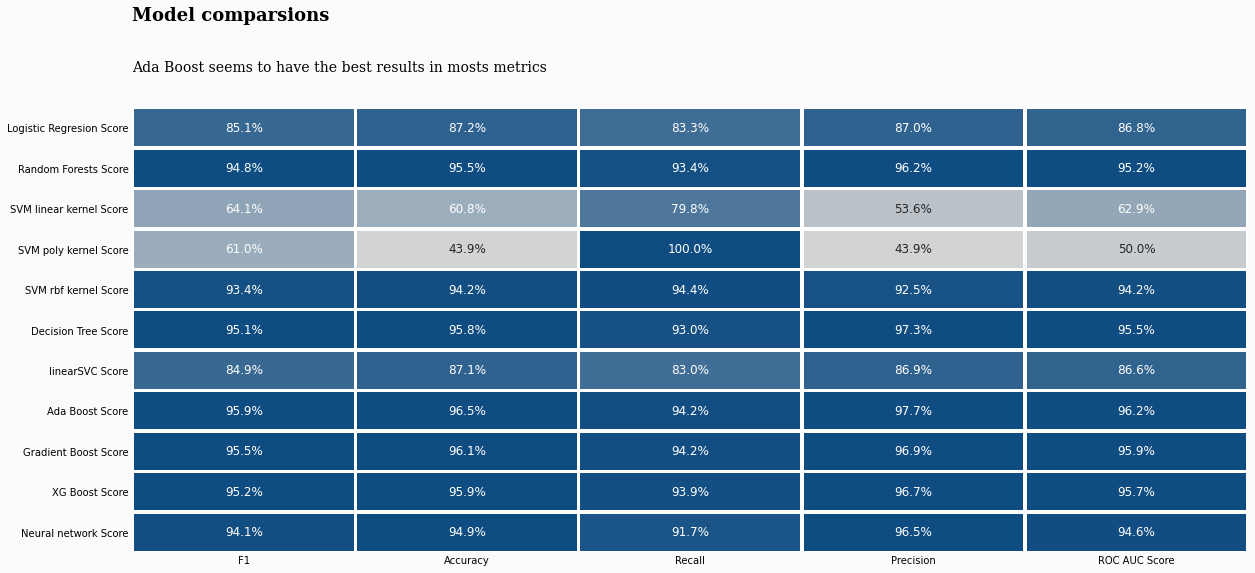

In [76]:
df_models = round(pd.concat([logistic_regression_df,random_forests_df,svm_linear_df, svm_poly_df, svm_rbf_df, decision_tree_df, linearSVC_df, adaBoost_df, gradientBoost_df, xgBoost_df, neural_df], axis=1),11)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(20,45)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Model comparsions',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Ada Boost seems to have the best results in mosts metrics',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

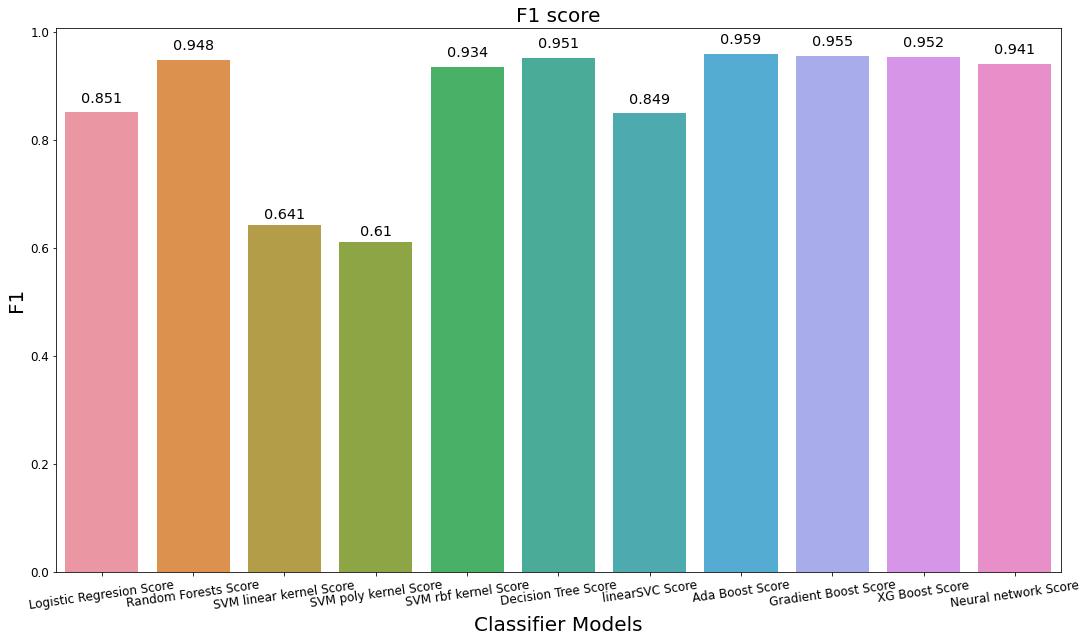

In [77]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[0])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('F1', fontsize = 20)
plt.title('F1 score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

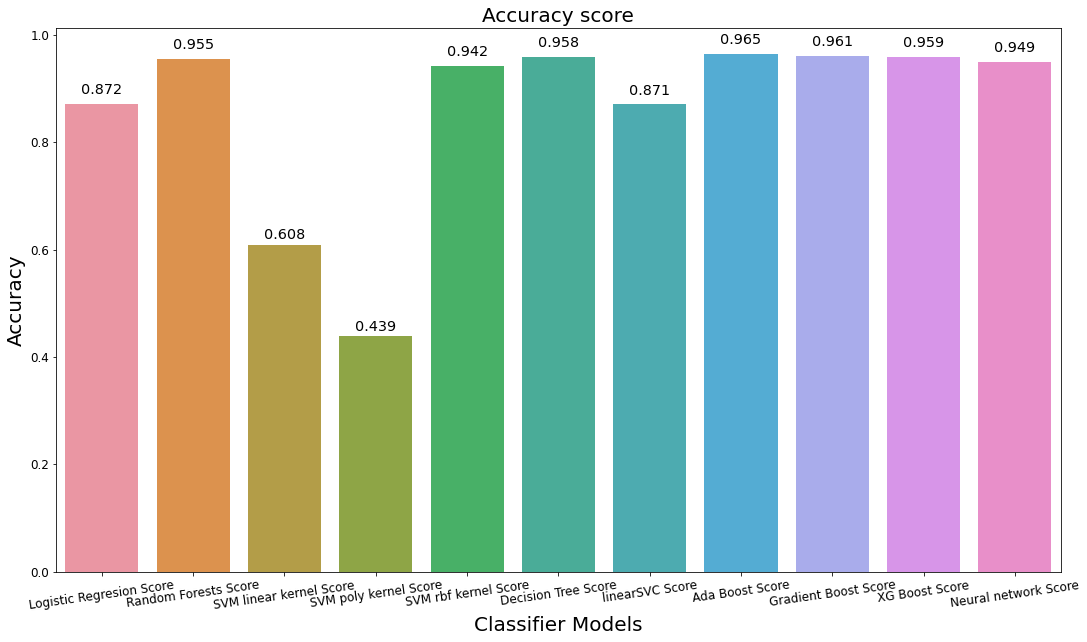

In [78]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[1])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

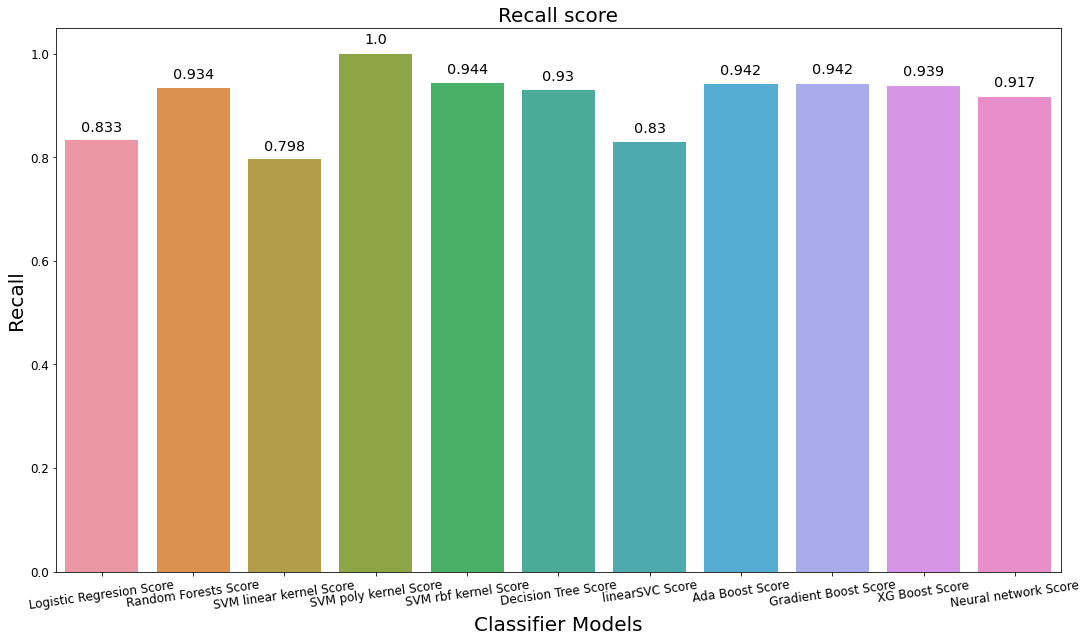

In [79]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[2])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Recall', fontsize = 20)
plt.title('Recall score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

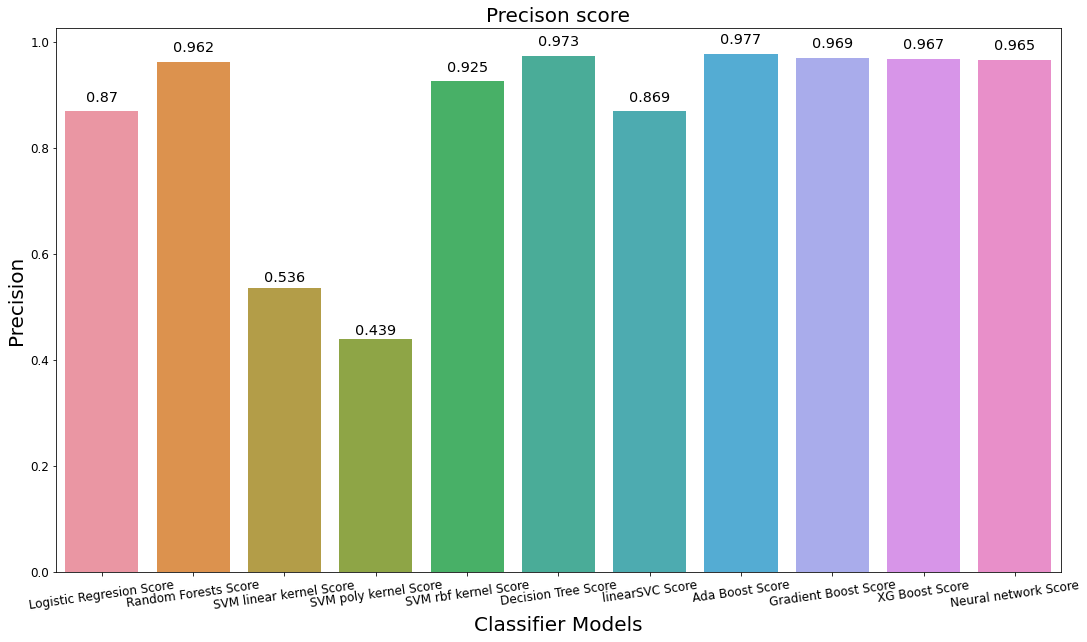

In [80]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x=df_models.columns, y=df_models.iloc[3])
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Precision', fontsize = 20)
plt.title('Precison score', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,3)}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()